# **Differential Privacy Examples (Student Version)**

## Cheaters vs. Non-cheaters with a Coin Flip
We will look at an imaginary scenario with basic coin flips. Say we want to estimate what proportion of students cheated on an exam. This is a sensitive question though, and students may feel uncomfortable answering honestly. So we can us DP to estimate while preserving individual privacy.

In [ ]:
import matplotlib.pyplot as plt #matplotlib to graph data
import random #random to implement the coin flip

First, we will see what the data looks like without differential privacy. Our raw data will be represented with 0s and 1s, where 0 means "did not cheat," and 1 means "cheated." 

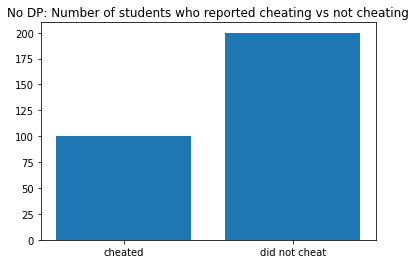

In [ ]:
rawData = []
#using the random library, append 300 random values of 0s and 1s to the rawData list (the ratio is up to you) 
#API: https://docs.python.org/3/library/random.html
#YOUR CODE HERE...


#to graph this data, convert the data into a dictionary, as shown below: 
#the code's provided here as an example
#for help with the matplotlib bar graphs: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html

plotData = {'cheated': rawData.count(1), 'did not cheat': rawData.count(0)}
labels = list(plotData.keys())
values = list(plotData.values())

plt.bar(labels, values)
plt.title("No DP: Number of students who reported cheating vs not cheating")
plt.show()

We can use the private_sum function to illustrate how DP can preserve privacy. Remember the data we used from before? Well, the first student reported only sleeping one hour, making them identifiable if there's no privacy measure to protect them.

Let's load a parallel database that has everyone else except the first student. Let's add a new student to the data. Assume that they actually did cheat. Now, run the outputs to see how their data point affects the graph. (Click on the graph if it's too small)

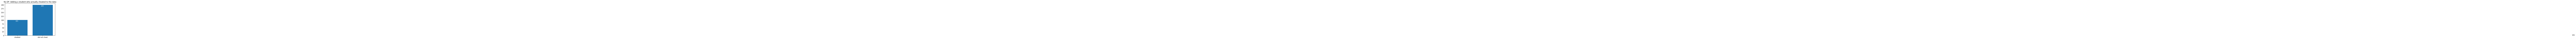

In [ ]:
#append a new data point to rawData, indicating that the student did actually cheat
#YOUR CODE HERE...



#convert the data into a dictionary, and create separate lists of the keys and the values
#YOUR CODE HERE...


#now, we graph the data, annotating the values onto the graph so we can see small differences
graph = plt.bar(labels, values)
for bar in graph:
  plt.annotate(bar.get_height(), xy=(bar.get_x()+0.33, bar.get_height()-10), fontsize=10, color="white")
#add a title to the graph (think about what this graph represents, in terms of DP use and parallel datasets)
#YOUR CODE HERE...


plt.show()

In this traditional survey, when we add a student, it's very easy to tell the difference between the two results. If the "cheated" count goes up, the student cheated. If the "did not cheat" count goes up, then they didn't cheat. because the cheated column is now 101 instead of 100, that means student #301 cheated.

To implement DP, each student flips a coin. If it lands on heads, they will truthfully answer. If it lands on tails, they flip another coin. If it lands on heads, they respond that they haven't cheated, and if it lands on tails, they respond that they have cheated.

Run the code multiple times. Notice how the graph changes every time? That's because DP algorithms inject randomness, such as we did with a coin flip.

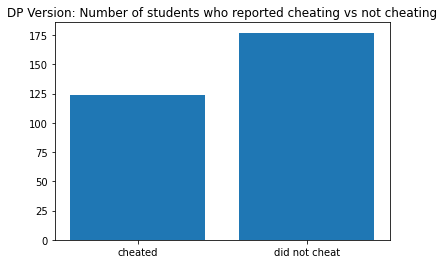

In [ ]:
dpData = []
#implement the coin flip algorithm
#hint: loop through each value in rawData
#      use random to "flip" a coin, and depending on the results, 
#      either append the original value to dpData, or a random value
#YOUR CODE HERE...


#convert the data into a dictionary
dpPlotData = #YOUR CODE HERE...

#plot the data (check back on the first graph as a guide)
#make sure to give an appropriate name to the graph
#YOUR CODE HERE...



Now, we can illustrate one of the main purposes of differential privacy: it will not be possible to tell the difference from the results of one dataset versus a parallel one.

Let's add another new student to the data. Assume that they actually did cheat.

In [ ]:
#append a new data point to rawData
#YOUR CODE HERE...


Now, run the outputs to see how their data point affects the graph. Try this multiple times and observe how the graph changes.

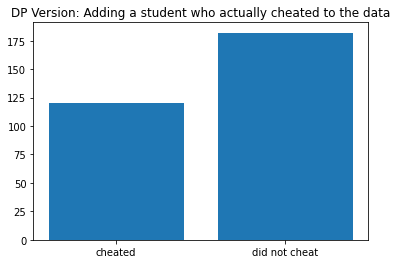

In [ ]:
#copy paste your code from the cell two blocks above,
#but change the title to be accurate
#YOUR CODE HERE...




As you see, we can't really tell if Student #302 cheated or not because the output results contain a degree of randomness.

Because of the randomness of the algorithm, this is where having a bigger dataset comes in handy. Now assume we have 30000 students instead of 300. Run through the code below. Observe how the DP graph does not significantly change, as the values follow the calculated probabilities.

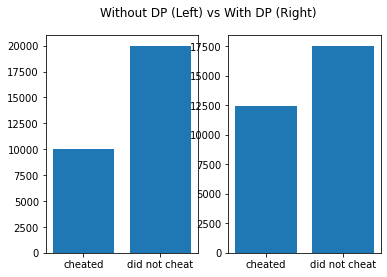

In [ ]:
#create a dictionary where the total number of data points is 30000 instead of 300
#then, create separate lists for keys and values
#YOUR CODE HERE...


dpPlotData = {'cheated': 0, 'did not cheat': 0}
#loop through the dictionary data, implementing DP on each data point, keeping track in dpPlotData
#then, create separate lists for keys and values
#YOUR CODE HERE...


#using subplots, graph the data without DP on the left, and data with DP on the right
#remember to add a clear title
#matplotlib subplot demo: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html 
#YOUR CODE HERE...


## Hours of Sleep with PyDP

Now, we will look at OpenMined's Python wrapper for Google's Differential Privacy project, PyDP, available here: https://github.com/OpenMined/PyDP. This library has functions for producing aggregate statistics with DP.

API: https://pydp.readthedocs.io/en/latest/

This example is adapted from their "Tutorial_1-carrots_demo."

In [ ]:
# Install the PyDP package
! pip install python-dp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.5 MB 4.1 MB/s 


In [ ]:
import pydp as dp  #dp is the convention
from pydp.algorithms.laplacian import BoundedSum, BoundedMean, Count, Max
import pandas as pd
import statistics 

You will be creating your own dataset with 100 points for this. Make sure there are two columns in the data: a number that represents each student, and the number of hours they slept (name them "student" and "hours_of_sleep")

Two options (uncomment the one you use):
1. create a CSV, upload it to GitHub, and read the raw data into a pandas DataFrame
2. create a pandas DataFrame and directly add your values

In [ ]:
#Option 1: link the raw version of the data in URL
#url = YOUR CODE HERE...
#df = pd.read_csv(url, sep=',', names=['student', 'hours_of_sleep'])

#Option 2: create multiple lists that each hold one student number and their hours of sleep. Append those to a larger list (use a loop)
#sleepData = []
#YOUR CODE HERE...
#
#df = pd.DataFrame(sleepData, columns=['student', 'hours_of_sleep'])

df.head()

,student,hours_of_sleep
0,1,1
1,2,5
2,3,7
3,4,11
4,5,4


Using the statistics library, we can first calculate the mean without DP.

In [ ]:
# calculates mean without applying differential privacy
def mean_hours(data) -> float:
    return statistics.mean(list(data["hours_of_sleep"]))

PyDP lets us calculate the private mean, where the user inputs a privacy_budget as an argument between 0 and 1. The closer to 0, the more private it is. 

In [ ]:
# calculates mean applying differential privacy
def private_mean(privacy_budget: float, data) -> float:
    #BoundedMean takes the privacy_budget as an input
    #privacy_budget is between 0 and 1
    #closer to 0 means more private, but lower accuracy
    x = BoundedMean(privacy_budget, 0, 1, 100)
    return x.quick_result(list(data["hours_of_sleep"]))

Notice the difference between the two numbers. Feel free to run this cell multiple times, observing how much the private mean fluctuates.


In [ ]:
#print the data with mean_hours applied, as well as private_mean applied
print("Mean: ", #YOUR CODE HERE...

#for private_mean, determine the privacy budget. Observe how different values change the output.
print("Private Mean: ", #YOUR CODE HERE...

Mean:  7.1
Private Mean:  8.130622794359226


Now say we want to find the number of students who sleep above a certain amount of hours. We can see how the results would look with and without DP.

In [ ]:
# Calculates number of students sleeping more than the required hours without DP
def count_above(required: int, data) -> int:
    return data[data.hours_of_sleep > required].count()[0]

In [ ]:
# Calculates number of students sleeping more than the required hours applying differential privacy.
def private_count_above(privacy_budget: float, required: int, data) -> int:
    x = Count(privacy_budget, dtype="int")
    return x.quick_result(list(data[data.hours_of_sleep > required]["hours_of_sleep"]))

In [ ]:
#print the number of students who sleep more than 8 hours using count_above and private_count_above
print("Above 8:\t" + str(#YOUR CODE HERE...
                         
#for private_count_above, determine the privacy budget. Observe how different values change the output.
print("Private Count Above:\t" + str(#YOUR CODE HERE...

Above 8:	25
private count above:	24


These next functions calculate the maximum number of hours slept by one student.

In [ ]:
# Function to return the maximum number of hours slept by one student without appyling differential privacy.
def max(data) -> int:
    return data.max()[1]

In [ ]:
# Function to return the maximum of the number of hours slept by one student appyling differential privacy.
def private_max(privacy_budget: float, data) -> int:
    # 0 and 150 are the upper and lower limits for the search bound.
    x = Max(epsilon = privacy_budget, lower_bound = 0, upper_bound = 100, dtype="int")
    return x.quick_result(list(data["hours_of_sleep"]))

In [ ]:
#print the maximum number of hours slept by one student using max and private_max
print("Max:\t" + str(#YOUR CODE HERE...
                     
#for private_max, determine the privacy budget. Observe how different values change the output.
print("Private Max:\t" + str(#YOUR CODE HERE...

Max:	13
private max:	9


These next functions calculate the sum of all the hours slept.

In [ ]:
# Function to calculate sum hours slept without DP.
def sum_hours(data) -> int:
    return data.sum()[1]

In [ ]:
# Function to calculate sum of hours slept applying differential privacy.
def private_sum(privacy_budget: float, data) -> int:
    x = BoundedSum(epsilon = privacy_budget, delta = 0, lower_bound= 1, upper_bound = 100, dtype="float")
    return x.quick_result(list(data["hours_of_sleep"]))

In [ ]:
#print the sum of all hours slept using sum_hours and private_sum
print("Sum:\t" + str(#YOUR CODE HERE...
                     
#for private_sum, determine the privacy budget. Observe how different values change the output.
print("Private Sum:\t" + str(private_sum(1, df)))

Sum:	710
Private Sum:	757.1186691547045


We can use the private_sum function to illustrate how DP can preserve privacy. Remember the data we used from before? Well, the first student reported only sleeping one hour, making them identifyable if there's no privacy measure to protect them.

Let's load a parallel database that has everyone else except the first student. 

In [ ]:
#make a parallel dataset using either of the methods from before
#everything should be the same, except the first row is removed
#name it "df2"
#YOUR CODE HERE...


df2.head()

,student,hours_of_sleep
0,2,5
1,3,7
2,4,11
3,5,4
4,6,9


As you can see, the first student is no longer there. Without DP, if we compared the sums of the first and second datasets, there would be a difference of 1, because Student #1 slept one hour. 

In [ ]:
#print the sums of the original database and the parallel database
print("Sum of original database:\t" + str(#YOUR CODE HERE...
print("Sum of parallel database without Student #1:\t" + str(#YOUR CODE HERE...

Sum of original database:	710
Sum of parallel database without Student #1:	709


But if we use private_sum, this will no longer be the case.

In [ ]:
#print the private sums of the original database and the parallel database
print("Private Sum of original database:\t" + str(#YOUR CODE HERE...
print("Private Sum of parallel database without Student #1:\t" + str(#YOUR CODE HERE...

Private Sum of original database:	807.7331904242747
Private Sum of parallel database without Student #1:	858.448823688901


Thus, by using DP, we preserve privacy as someone wouldn't be able to tell whether an individual was in a database or not.